<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_cluster_data_multi_delta_(2_8)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_2.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2.8_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,59.105827,57.918903,93.590790,51.538028,410.320732,682.474281,228.241182,454.233099
1,0.0,1.0,68.056731,36.063583,98.317368,58.144651,172.710149,443.292482,178.814067,264.478415
2,0.0,2.0,27.799787,43.121794,90.596262,23.580374,-285.492632,-90.394416,286.848821,-377.243236
3,0.0,3.0,85.341234,61.968535,40.685266,94.661418,-416.000346,-123.343894,67.562332,-190.906225
4,0.0,4.0,21.584642,21.295647,53.133299,42.314610,54.705583,203.033781,161.735136,41.298645
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,39.103640,25.371076,46.213075,86.518070,5.142326,212.348187,219.652970,-7.304783
29996,999.0,26.0,66.126559,60.519545,48.702360,67.739554,-34.425215,218.662803,210.844228,7.818575
29997,999.0,27.0,37.921699,62.087554,62.798627,58.615276,-280.012199,-48.589043,-3.308416,-45.280627
29998,999.0,28.0,95.164930,53.944660,32.163171,70.442050,111.988482,373.703292,378.644880,-4.941588


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    59.105827  57.918903  93.590790  51.538028  410.320732   
      1.0    68.056731  36.063583  98.317368  58.144651  172.710149   
      2.0    27.799787  43.121794  90.596262  23.580374 -285.492632   
      3.0    85.341234  61.968535  40.685266  94.661418 -416.000346   
      4.0    21.584642  21.295647  53.133299  42.314610   54.705583   
...                ...        ...        ...        ...         ...   
999.0 25.0   39.103640  25.371076  46.213075  86.518070    5.142326   
      26.0   66.126559  60.519545  48.702360  67.739554  -34.425215   
      27.0   37.921699  62.087554  62.798627  58.615276 -280.012199   
      28.0   95.164930  53.944660  32.163171  70.442050  111.988482   
      29.0   32.215051  66.491923  58.749839  77.900738 -139.459405   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    682.474281  228.241182  454.233099  
      1.0    443.292482  178.814067  264.478415  
      2.0    -90.394416  286.848821 -377.243236  
      3.0   -123.343894   67.562332 -190.906225  
      4.0    203.033781  161.735136   41.298645  
...                 ...         ...         ...  
999.0 25.0   212.348187  219.652970   -7.304783  
      26.0   218.662803  210.844228    7.818575  
      27.0   -48.589043   -3.308416  -45.280627  
      28.0   373.703292  378.644880   -4.941588  
      29.0   105.898146  101.928715    3.969431  

[30000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    59.105827  57.918903  93.590790  51.538028  410.320732   
      1.0    68.056731  36.063583  98.317368  58.144651  172.710149   
      2.0    27.799787  43.121794  90.596262  23.580374 -285.492632   
      3.0    85.341234  61.968535  40.685266  94.661418 -416.000346   
      4.0    21.584642  21.295647  53.133299  42.314610   54.705583   
...                ...        ...        ...        ...         ...   
999.0 25.0   39.103640  25.371076  46.213075  86.518070    5.142326   
      26.0   66.126559  60.519545  48.702360  67.739554  -34.425215   
      27.0   37.921699  62.087554  62.798627  58.615276 -280.012199   
      28.0   95.164930  53.944660  32.163171  70.442050  111.988482   
      29.0   32.215051  66.491923  58.749839  77.900738 -139.459405   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    682.474281  228.241182  454.233099  
      1.0    443.292482  178.814067  264.478415  
      2.0    -90.394416  286.848821 -377.243236  
      3.0   -123.343894   67.562332 -190.906225  
      4.0    203.033781  161.735136   41.298645  
...                 ...         ...         ...  
999.0 25.0   212.348187  219.652970   -7.304783  
      26.0   218.662803  210.844228    7.818575  
      27.0   -48.589043   -3.308416  -45.280627  
      28.0   373.703292  378.644880   -4.941588  
      29.0   105.898146  101.928715    3.969431  

[30000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,59.105827,57.918903,93.590790,51.538028,410.320732,682.474281,228.241182,454.233099
1,0.0,1.0,68.056731,36.063583,98.317368,58.144651,172.710149,443.292482,178.814067,264.478415
2,0.0,2.0,27.799787,43.121794,90.596262,23.580374,-285.492632,-90.394416,286.848821,-377.243236
3,0.0,3.0,85.341234,61.968535,40.685266,94.661418,-416.000346,-123.343894,67.562332,-190.906225
4,0.0,4.0,21.584642,21.295647,53.133299,42.314610,54.705583,203.033781,161.735136,41.298645
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,39.103640,25.371076,46.213075,86.518070,5.142326,212.348187,219.652970,-7.304783
29996,999.0,26.0,66.126559,60.519545,48.702360,67.739554,-34.425215,218.662803,210.844228,7.818575
29997,999.0,27.0,37.921699,62.087554,62.798627,58.615276,-280.012199,-48.589043,-3.308416,-45.280627
29998,999.0,28.0,95.164930,53.944660,32.163171,70.442050,111.988482,373.703292,378.644880,-4.941588


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    59.105827  57.918903  93.590790  51.538028  410.320732   
      1.0    68.056731  36.063583  98.317368  58.144651  172.710149   
      2.0    27.799787  43.121794  90.596262  23.580374 -285.492632   
      3.0    85.341234  61.968535  40.685266  94.661418 -416.000346   
      4.0    21.584642  21.295647  53.133299  42.314610   54.705583   
...                ...        ...        ...        ...         ...   
999.0 25.0   39.103640  25.371076  46.213075  86.518070    5.142326   
      26.0   66.126559  60.519545  48.702360  67.739554  -34.425215   
      27.0   37.921699  62.087554  62.798627  58.615276 -280.012199   
      28.0   95.164930  53.944660  32.163171  70.442050  111.988482   
      29.0   32.215051  66.491923  58.749839  77.900738 -139.459405   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    682.474281  228.241182  454.233099  
      1.0    443.292482  178.814067  264.478415  
      2.0    -90.394416  286.848821 -377.243236  
      3.0   -123.343894   67.562332 -190.906225  
      4.0    203.033781  161.735136   41.298645  
...                 ...         ...         ...  
999.0 25.0   212.348187  219.652970   -7.304783  
      26.0   218.662803  210.844228    7.818575  
      27.0   -48.589043   -3.308416  -45.280627  
      28.0   373.703292  378.644880   -4.941588  
      29.0   105.898146  101.928715    3.969431  

[30000 rows x 8 columns]

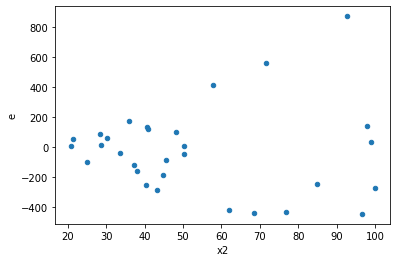

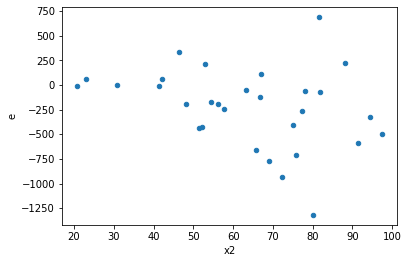

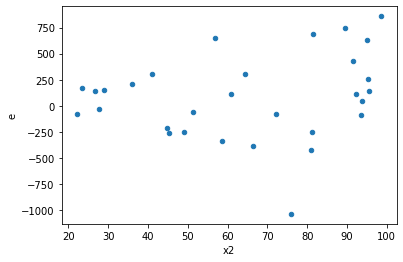

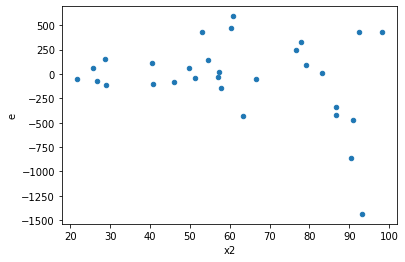

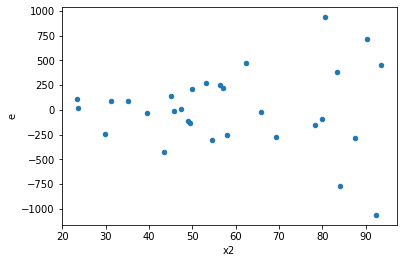

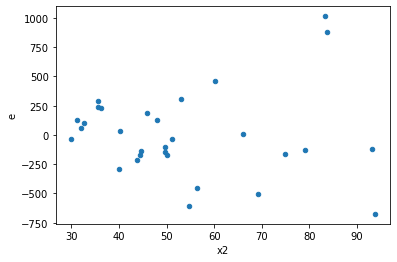

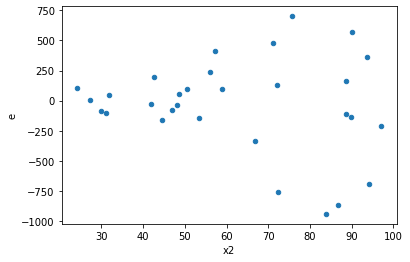

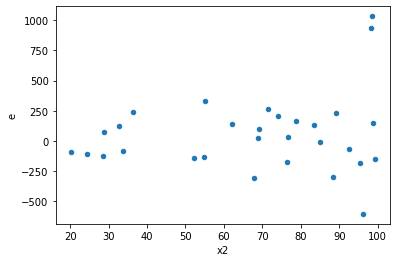

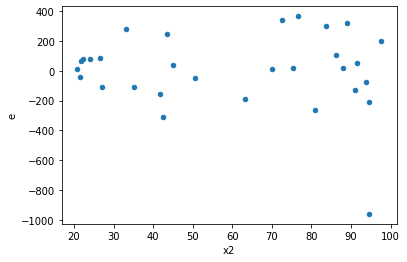

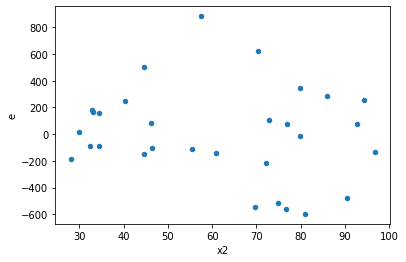

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[['x1', 'x2', 'x3', 'x4']]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
3.0,13.0,9.0,741006.9107126041,1915618.684981128,57000.531593277236,212846.52055345866,3.7341146583019276,0.05418064983436954,0.9729096750828152,0.02709032491718477,Reject001=1 : Homoscedasticity
5.0,13.0,9.0,759478.719566589,2347031.643964965,58421.43996666069,260781.293773885,4.46379435225672,0.03044542985745813,0.9847772850712709,0.015222714928729064,Reject001=1 : Homoscedasticity
6.0,9.0,13.0,297300.37862113427,3070641.057152232,33033.375402348254,236203.1582424794,7.150439680036099,0.001779298722861311,0.9991103506385693,0.0008896493614306555,Reject001=0 : Heteroscedasticity
8.0,10.0,12.0,228175.92656350447,1108550.1237723797,22817.592656350447,92379.17698103165,4.048594361917547,0.02526262051184891,0.9873686897440755,0.012631310255924455,Reject001=1 : Homoscedasticity
10.0,13.0,9.0,838215.0840411427,1949192.1051558396,64478.08338778021,216576.90057287106,3.3589227407760758,0.07502375582303933,0.9624881220884803,0.037511877911519664,Reject001=1 : Homoscedasticity
12.0,9.0,13.0,1232645.6259011517,2358819.728476751,136960.62510012797,181447.67142128854,1.3248163206661576,0.6248815074481806,0.6875592462759097,0.3124407537240903,Reject001=1 : Homoscedasticity
13.0,6.0,16.0,299381.77413248504,4519165.469488068,49896.96235541417,282447.8418430042,5.6606219799742306,0.00510338330901372,0.9974483083454931,0.00255169165450686,Reject001=0 : Heteroscedasticity
14.0,9.0,13.0,1063603.1298981176,3270268.897073836,118178.12554423528,251559.14592875662,2.1286438989472334,0.20942333973780802,0.895288330131096,0.10471166986890401,Reject001=1 : Homoscedasticity
15.0,5.0,17.0,40759.255506259,1814748.265621748,8151.851101251801,106749.89797774989,13.095172697813057,4.9873598797711693e-05,0.9999750632006011,2.4936799398855847e-05,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,10.0,12.0,1340288.0594897403,342037.8470963598,134028.80594897404,28503.153924696653,0.21266438750150515,0.020056337941493203,Reject001=1 : Homoscedasticity
1.0,12.0,10.0,2216341.8499677973,574238.828496771,184695.1541639831,57423.8828496771,0.3109116918069915,0.059228607592905595,Reject001=1 : Homoscedasticity
2.0,14.0,8.0,2863336.568005493,351724.43637860136,204524.04057182092,43965.55454732517,0.21496521594431423,0.01211208500155028,Reject001=1 : Homoscedasticity
3.0,13.0,9.0,741006.9107126041,1915618.684981128,57000.531593277236,212846.52055345866,3.7341146583019276,0.05418064983436954,Reject001=1 : Homoscedasticity
4.0,12.0,10.0,1630173.9957859023,992129.9260751724,135847.83298215852,99212.99260751724,0.7303244404387909,0.5980155855157188,Reject001=1 : Homoscedasticity
5.0,13.0,9.0,759478.719566589,2347031.643964965,58421.43996666069,260781.293773885,4.46379435225672,0.03044542985745813,Reject001=1 : Homoscedasticity
6.0,9.0,13.0,297300.37862113427,3070641.057152232,33033.375402348254,236203.1582424794,7.150439680036099,0.001779298722861311,Reject001=0 : Heteroscedasticity
7.0,9.0,13.0,1442600.1176856707,279352.5456070444,160288.90196507453,21488.657354388033,0.13406204104555045,0.004926040159976966,Reject001=0 : Heteroscedasticity
8.0,10.0,12.0,228175.92656350447,1108550.1237723797,22817.592656350447,92379.17698103165,4.048594361917547,0.02526262051184891,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      766
Reject001=0 : Heteroscedasticity    234
Name: Result_test, dtype: int64